cd /content/drive/MyDrive/Applied_FP/final_project

In [ ]:
pip install AStockEnv

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement AStockEnv (from versions: none)
ERROR: No matching distribution found for AStockEnv

[notice] A new release of pip available: 22.2.2 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install gym

  Using cached gym-0.26.2.tar.gz (721 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached gym_notices-0.0.8-py3-none-any.whl (3.0 kB)
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827642 sha256=2a8e4cc3e1063dc587b2b51f9ffdec3382480a4d33116068aa120f178fc8cf1d
  Stored in directory: c:\users\ella\appdata\local\pip\cache\wheels\af\2b\30\5e78b8b9599f2a2286a582b8da80594f654bf0e18d825a4405
Successfully built gym
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import datetime
import warnings
import random
from datetime import datetime
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud

In [4]:
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import roc_auc_score,accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold

In [6]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

! pip install nltk

In [7]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [8]:
np.random.seed(42)

pd.set_option('display.max_columns', 100, 'display.width', 1024)
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')
mpl.rcParams['axes.facecolor'] = '#12162f'
plt.grid(False)
plt.close()

## 1. Load Dataset

In [ ]:
# Read CSV casitng dates
answers = pd.read_csv('answers.csv')
answer_scores = pd.read_csv('answer_scores.csv')
comments = pd.read_csv('comments.csv')
emails = pd.read_csv('emails.csv')
groups = pd.read_csv('groups.csv')
group_memberships = pd.read_csv('group_memberships.csv')
matches = pd.read_csv('matches.csv')
professionals = pd.read_csv('professionals.csv')
questions = pd.read_csv('questions.csv')
question_scores = pd.read_csv('question_scores.csv') 
school_memberships = pd.read_csv('school_memberships.csv')
students = pd.read_csv('students.csv')
tags = pd.read_csv('tags.csv')
tag_questions = pd.read_csv('tag_questions.csv')
tag_users = pd.read_csv('tag_users.csv')

In [ ]:
def info_table(df):
  display(df.head())
  display(df.shape)
  display(df.info())
  display(df.isna().sum())

In [ ]:
info_table(answers)

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,<p>Hi. I joined the Army after I attended coll...
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"<p>Dear Priyanka,</p><p>Greetings! I have answ..."
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47 UTC+0000,<p>I work for a global company who values high...
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33 UTC+0000,I agree with Denise. Every single job I've had...


(51123, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51123 entries, 0 to 51122
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   answers_id           51123 non-null  object
 1   answers_author_id    51123 non-null  object
 2   answers_question_id  51123 non-null  object
 3   answers_date_added   51123 non-null  object
 4   answers_body         51122 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


None

answers_id             0
answers_author_id      0
answers_question_id    0
answers_date_added     0
answers_body           1
dtype: int64

## 2. Some Cleaning

### 2.1 Time variables

In [ ]:
answers['answers_date_added'] = pd.to_datetime(answers['answers_date_added'], infer_datetime_format=True)
comments['comments_date_added'] = pd.to_datetime(comments['comments_date_added'], infer_datetime_format=True)
emails['emails_date_sent'] = pd.to_datetime(emails['emails_date_sent'], infer_datetime_format=True)
professionals['professionals_date_joined'] = pd.to_datetime(professionals['professionals_date_joined'], infer_datetime_format=True)
questions['questions_date_added'] = pd.to_datetime(questions['questions_date_added'], infer_datetime_format=True)
students['students_date_joined'] = pd.to_datetime(students['students_date_joined'], infer_datetime_format=True)

### 2.2 Clean text

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
def clean_text(raw_text):
    # Function to convert a raw review to a string of words
    new_text = BeautifulSoup(raw_text).get_text()
    # Only keep letters
    letters_only = re.sub("[^a-zA-Z]", " ", new_text) 
    # 7. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    return( " ".join(words)) 

In [ ]:
# questions
num_questions = questions['questions_title'].size
clean_question_title = []
clean_question_body = []
for i in range(0,num_questions):
  clean_question_title.append(clean_text(questions.iloc[i]["questions_title"]))
  clean_question_body.append(clean_text(questions.iloc[i]["questions_body"])) 
questions['questions_title'] = clean_question_title
questions['questions_body'] = clean_question_body

In [ ]:
# tags
tags = tags.dropna(how='any')
num_tags = tags['tags_tag_name'].size
clean_tags_names = []
for i in range(0,num_tags):
  clean_tags_names.append(clean_text(tags.iloc[i]["tags_tag_name"]))
tags['tags_tag_name'] = clean_tags_names

In [ ]:
# comments
comments = comments.dropna(how='any')
num_comments = comments['comments_body'].size
clean_comments = []
for i in range(0,num_comments):
  clean_comments.append(clean_text(comments.iloc[i]["comments_body"]))
comments['comments_body'] = clean_comments

In [ ]:
# answers
answers = answers.dropna(how='any')
num_answers = answers['answers_body'].size
clean_answers = []
for i in range(0,num_answers):
  clean_answers.append(clean_text(answers.iloc[i]["answers_body"]))
answers['answers_body'] = clean_answers

## 3. Feature Engineering
- Embeddings: question title,body, question tags(roberta, tf-idf, PCA)
- Numerical: how long of the question, how many tags, how many comments, avg len of comments, how many answers, avg len of answers, avg response time(days), avg number of tags of prefessionals, highest score of answers
- Categorical: year and month 



### 3.1 Year and Month

In [ ]:
# year, month
questions['Year'] = questions['questions_date_added'].dt.year
questions['Month'] = questions['questions_date_added'].dt.month

### 3.2 Length of questions

In [ ]:
# question_len
questions_n_scores = pd.merge(questions, question_scores, left_on='questions_id', right_on='id', how='left')
questions_n_scores['question_whole'] = questions_n_scores['questions_title'] + '  ' + questions_n_scores['questions_body']
questions_n_scores['question_len'] = questions_n_scores['question_whole'].apply(lambda x: len(x.split(' ')))
questions_n_scores_c = questions_n_scores[['questions_id','questions_author_id','questions_date_added','Year','Month','question_whole','question_len','score']]

In [ ]:
questions_n_scores_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23931 entries, 0 to 23930
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   questions_id          23931 non-null  object             
 1   questions_author_id   23931 non-null  object             
 2   questions_date_added  23931 non-null  datetime64[ns, UTC]
 3   Year                  23931 non-null  int64              
 4   Month                 23931 non-null  int64              
 5   question_whole        23931 non-null  object             
 6   question_len          23931 non-null  int64              
 7   score                 23928 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(3)
memory usage: 1.6+ MB


### 3.3 Average length of comments and number of comments

In [ ]:
temp_comlen = pd.DataFrame(comments.groupby('comments_parent_content_id')['comments_body'].apply(lambda x: x.str.split().str.len().mean())).reset_index().rename(columns={"comments_parent_content_id": "id_question", "comments_body": "avg_comlen"})
temp_comnum = pd.DataFrame(comments.groupby('comments_parent_content_id')['comments_id'].count()).reset_index().rename(columns={"comments_parent_content_id": "id_question", "comments_id": "number_of_comments"})

In [ ]:
# comments avg len, number of comments
questions_n_scores_c = pd.merge(questions_n_scores_c, temp_comnum, left_on='questions_id', right_on='id_question', how='left')
questions_n_scores_c.drop('id_question',axis=1,inplace=True)
# questions_n_scores_c = questions_n_scores_c.fillna(0)
questions_n_scores_c = pd.merge(questions_n_scores_c, temp_comlen, left_on='questions_id', right_on='id_question', how='left')
questions_n_scores_c.drop('id_question',axis=1,inplace=True)
# questions_n_scores_c = questions_n_scores_c.fillna(0)

In [ ]:
questions_n_scores_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23931 entries, 0 to 23930
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   questions_id          23931 non-null  object             
 1   questions_author_id   23931 non-null  object             
 2   questions_date_added  23931 non-null  datetime64[ns, UTC]
 3   Year                  23931 non-null  int64              
 4   Month                 23931 non-null  int64              
 5   question_whole        23931 non-null  object             
 6   question_len          23931 non-null  int64              
 7   score                 23928 non-null  float64            
 8   number_of_comments    1875 non-null   float64            
 9   avg_comlen            1875 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(3), object(3)
memory usage: 2.0+ MB


### 3.4 Number of tags and combine all tags for each question

In [ ]:
# number of tags
tags = tags.replace('零售','retail')
tags_full = pd.merge(tag_questions, tags, left_on='tag_questions_tag_id', right_on='tags_tag_id', how='left')
tags_full.drop('tag_questions_tag_id',axis=1,inplace=True)
temp_tags = pd.DataFrame(tags_full.groupby('tag_questions_question_id')['tags_tag_id'].count()).reset_index().rename(columns={"tag_questions_question_id": "id_question", "tags_tag_id": "number_of_tags"})
questions_n_scores_tags = pd.merge(questions_n_scores_c, temp_tags, left_on='questions_id', right_on='id_question', how='left')
questions_n_scores_tags.drop('id_question',axis=1,inplace=True)
questions_n_scores_tags = questions_n_scores_tags.fillna(0)

In [ ]:
tags_grouped = tags_full.groupby('tag_questions_question_id', as_index=False)[['tags_tag_name']] \
            .agg(lambda x: ' '.join(set(x)))
questions_n_scores_tags = pd.merge(questions_n_scores_tags,tags_grouped,left_on='questions_id', right_on='tag_questions_question_id', how='left')
questions_n_scores_tags.drop('tag_questions_question_id',axis=1,inplace=True)

### 3.5 Average length of answers and number of answers

In [ ]:
temp_anslen = pd.DataFrame(answers.groupby('answers_question_id')['answers_body'].apply(lambda x: x.str.split().str.len().mean())).reset_index().rename(columns={"answers_question_id": "id_question", "answers_body": "avg_anslen"})
temp_ansnum = pd.DataFrame(answers.groupby('answers_question_id')['answers_id'].count()).reset_index().rename(columns={"answers_question_id": "id_question", "answers_id": "number_of_answers"})

In [ ]:
# answers avg len. number of answers
questions_n_scores_tags = pd.merge(questions_n_scores_tags, temp_ansnum, left_on='questions_id', right_on='id_question', how='left')
questions_n_scores_tags.drop('id_question',axis=1,inplace=True)
questions_n_scores_tags = questions_n_scores_tags.fillna(0)

In [ ]:
questions_n_scores_tags = pd.merge(questions_n_scores_tags, temp_anslen, left_on='questions_id', right_on='id_question', how='left')
questions_n_scores_tags.drop('id_question',axis=1,inplace=True)
questions_n_scores_tags = questions_n_scores_tags.fillna(0)

### 3.6 Highest score of answers to each question

In [ ]:
# highest score of answers
answers_full =  pd.merge(answers, answer_scores, left_on='answers_id', right_on='id', how='left')
answers_full.drop('id',axis=1,inplace=True)

In [ ]:
answer_maxscore = answers_full.groupby('answers_question_id')['score'].max().reset_index().rename(columns={"answers_question_id": "id_question", "score": "max_anscore"})
questions_n_scores_tags = pd.merge(questions_n_scores_tags, answer_maxscore, left_on='questions_id', right_on='id_question', how='left')
questions_n_scores_tags.drop('id_question',axis=1,inplace=True)
questions_n_scores_tags = questions_n_scores_tags.fillna(0)

In [ ]:
questions_n_scores_tags

,questions_id,questions_author_id,questions_date_added,Year,Month,question_whole,question_len,score,number_of_comments,avg_comlen,number_of_tags,tags_tag_name,number_of_answers,avg_anslen,max_anscore
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,2016,4,teacher career question what is a maths teach...,18,1.0,0.0,0.0,3.0,lecture professor college,1.0,50.000000,0.0
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25+00:00,2016,5,i want to become an army officer what can i do...,55,5.0,0.0,0.0,2.0,military army,2.0,309.000000,0.0
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38+00:00,2017,2,will going abroad for your first job increase ...,110,2.0,0.0,0.0,2.0,overseas working abroad,1.0,72.000000,0.0
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32+00:00,2017,9,to become a specialist in business management ...,37,2.0,0.0,0.0,2.0,networking business,2.0,233.500000,0.0
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54+00:00,2017,9,are there any scholarships out there for stude...,44,2.0,0.0,0.0,4.0,highschoolsenior college scholarships firstgen...,2.0,33.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23926,ce1ff7a035d74721a5b7d21105f9ddb6,c1c6e6a8c9df4c02af52eda6fa0c552f,2016-04-07 01:08:59+00:00,2016,4,what is a computer engineer a computer program...,24,9.0,0.0,0.0,0.0,0,7.0,213.142857,4.0
23927,7df38c9ded4a4474bb4f9c1f659e1ad1,6ab792d625e14eb2abc14f9a57a450aa,2015-01-26 17:44:44+00:00,2015,1,what major do i need to study to be a writer ...,110,5.0,0.0,0.0,5.0,educator journalism novel writer writer famous,2.0,171.000000,2.0
23928,63c89317413046f483020585f0cc8dc4,977428d851b24183b223be0eb8619a8c,2011-11-09 20:42:47+00:00,2011,11,which careers are good if i enjoy working with...,73,5.0,1.0,13.0,2.0,children education,6.0,70.000000,8.0
23929,b64ef9cf0d33475ca9c22bdb8749f5a8,82cc74c0e18347e4b68b219e250eb10f,2016-05-28 03:08:07+00:00,2016,5,how can going to college help me advance my ca...,56,4.0,0.0,0.0,2.0,law enforcement police,4.0,125.250000,0.0


### 3.7 Average response time to each question

In [ ]:
# avg respond time
questions_sub = questions_n_scores_tags[['questions_id','questions_date_added']]

In [ ]:
# merge answers and questions to find the response time
answers_questions = pd.merge(questions_sub,answers_full,left_on='questions_id', right_on='answers_question_id', how='left')

In [ ]:
answers_questions['response_time'] = (answers_questions['answers_date_added'] - answers_questions['questions_date_added']).dt.days

In [ ]:
temp_response = answers_questions.groupby('questions_id')['response_time'].mean().reset_index().rename(columns={'questions_id':'id_question','response_time':'avg_restime'})

In [ ]:
questions_n_scores_tags = pd.merge(questions_n_scores_tags,temp_response,left_on='questions_id', right_on='id_question', how='left')
questions_n_scores_tags.drop('id_question',axis=1,inplace=True)
questions_n_scores_tags = questions_n_scores_tags.fillna(4000) # didn't get response

### 3.8 Average number of tags of professionals to each question

In [ ]:
tags_user_full = pd.merge(tag_users, tags, left_on='tag_users_tag_id', right_on='tags_tag_id', how='left')
tags_user_full.drop('tag_users_tag_id',axis=1,inplace=True)

In [ ]:
professionals_tags = pd.merge(professionals,tags_user_full,left_on='professionals_id',right_on='tag_users_user_id',how='left')
professionals_tags.drop(['tag_users_user_id'],axis=1,inplace=True)

In [ ]:
temp_prof_tags = professionals_tags.groupby('professionals_id')['tags_tag_id'].count().reset_index().rename(columns={'professionals_id':'id_prof','tags_tag_id':'number_of_prof_tags'})

In [ ]:
answers_sub = answers[['answers_id','answers_question_id','answers_author_id']]
answers_prof_tags = pd.merge(answers_sub,temp_prof_tags,left_on='answers_author_id', right_on='id_prof', how='left')
answers_prof_tags = answers_prof_tags.fillna(0)
answers_prof_tags.drop('id_prof',axis=1,inplace=True)

In [ ]:
questions_sub = questions_n_scores_tags[['questions_id','questions_author_id']]

In [ ]:
# merge questions and professionals to find the number of tags of professionals
questions_prof_tags = pd.merge(questions_sub,answers_prof_tags,left_on='questions_id', right_on='answers_question_id', how='left')
questions_prof_tags.drop(['answers_id','answers_question_id'],axis=1,inplace=True)
questions_prof_tags = questions_prof_tags.fillna(0)

In [ ]:
temp_prof_tags_num = questions_prof_tags.groupby('questions_id')['number_of_prof_tags'].mean().reset_index().rename(columns={'questions_id':'id_question','number_of_prof_tags':'avg_prof_tags'})

In [ ]:
questions_n_scores_tags = pd.merge(questions_n_scores_tags,temp_prof_tags_num,left_on='questions_id', right_on='id_question', how='left')
questions_n_scores_tags.drop('id_question',axis=1,inplace=True)
questions_n_scores_tags = questions_n_scores_tags.fillna(0)

In [ ]:
questions_n_scores_tags

,questions_id,questions_author_id,questions_date_added,Year,Month,question_whole,question_len,score,number_of_comments,avg_comlen,number_of_tags,tags_tag_name,number_of_answers,avg_anslen,max_anscore,avg_restime,avg_prof_tags
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,2016,4,teacher career question what is a maths teach...,18,1.0,0.0,0.0,3.0,lecture professor college,1.0,50.000000,0.0,3.000000,12.000000
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25+00:00,2016,5,i want to become an army officer what can i do...,55,5.0,0.0,0.0,2.0,military army,2.0,309.000000,0.0,710.500000,8.500000
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38+00:00,2017,2,will going abroad for your first job increase ...,110,2.0,0.0,0.0,2.0,overseas working abroad,1.0,72.000000,0.0,90.000000,5.000000
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32+00:00,2017,9,to become a specialist in business management ...,37,2.0,0.0,0.0,2.0,networking business,2.0,233.500000,0.0,41.500000,16.000000
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54+00:00,2017,9,are there any scholarships out there for stude...,44,2.0,0.0,0.0,4.0,highschoolsenior college scholarships firstgen...,2.0,33.000000,0.0,154.000000,13.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23926,ce1ff7a035d74721a5b7d21105f9ddb6,c1c6e6a8c9df4c02af52eda6fa0c552f,2016-04-07 01:08:59+00:00,2016,4,what is a computer engineer a computer program...,24,9.0,0.0,0.0,0.0,0,7.0,213.142857,4.0,11.000000,3.142857
23927,7df38c9ded4a4474bb4f9c1f659e1ad1,6ab792d625e14eb2abc14f9a57a450aa,2015-01-26 17:44:44+00:00,2015,1,what major do i need to study to be a writer ...,110,5.0,0.0,0.0,5.0,educator journalism novel writer writer famous,2.0,171.000000,2.0,4.500000,14.500000
23928,63c89317413046f483020585f0cc8dc4,977428d851b24183b223be0eb8619a8c,2011-11-09 20:42:47+00:00,2011,11,which careers are good if i enjoy working with...,73,5.0,1.0,13.0,2.0,children education,6.0,70.000000,8.0,614.166667,3.166667
23929,b64ef9cf0d33475ca9c22bdb8749f5a8,82cc74c0e18347e4b68b219e250eb10f,2016-05-28 03:08:07+00:00,2016,5,how can going to college help me advance my ca...,56,4.0,0.0,0.0,2.0,law enforcement police,4.0,125.250000,0.0,94.500000,2.000000


### 3.9 Create target variable


In [ ]:
questions_n_scores_tags['score'].describe()

count    23931.000000
mean         2.899962
std          4.745431
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        125.000000
Name: score, dtype: float64

- 75% questions have a sore higher than 3
- popular questions are rare
- questions with a score higher than or equal to 4 are class1(popular questions)

In [ ]:
def score_class(orig_score):
  if orig_score < 4: 
    return 0
  else:
    return 1
questions_n_scores_tags['label'] = questions_n_scores_tags['score'].apply(score_class)

### 3.10 Drop invalid tags

In [ ]:
questions_n_scores_tags = questions_n_scores_tags[questions_n_scores_tags['tags_tag_name']!=0]
questions_n_scores_tags = questions_n_scores_tags[~questions_n_scores_tags['tags_tag_name'].isna()]

### 3.11 Save processed dataset

In [ ]:
questions_n_scores_tags.to_csv('/content/drive/MyDrive/Applied_FP/final_project/questions_n_scores_tags.csv')

In [9]:
questions_n_scores_tags = pd.read_csv('questions_n_scores_tags.csv',index_col=0)

### 3.12 Get balanced dataset

In [10]:
questions_n_scores_tags['label'].value_counts(1)

0    0.757999
1    0.242001
Name: label, dtype: float64

- tried to use SMOTE, performance was not so good
- Since we have a huge dataset, just sample class0, to make it has same number of data points as class1

In [ ]:
# can try this
#from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import Pipeline
#smt = SMOTE(random_state=2023)
#pipe = Pipeline([('smote', smt), ('lr', LR)])

In [ ]:
def get_balanced(df,target):
  df_0 = df[df[target]==0]
  df_1 = df[df[target]==1]
  df_sub_0 = df_0.sample(len(df_1))
  df_sub = pd.concat([df_sub_0,df_1],ignore_index=True)
  df_sub = sklearn.utils.shuffle(df_sub) 
  return df_sub

In [ ]:
question_final_bl = get_balanced(questions_n_scores_tags,'label')

In [ ]:
question_final_bl.shape

(11270, 18)

In [ ]:
question_final_bl['label'].value_counts()

0    5635
1    5635
Name: label, dtype: int64

In [ ]:
question_final_bl

,questions_id,questions_author_id,questions_date_added,Year,Month,question_whole,question_len,score,number_of_comments,avg_comlen,number_of_tags,tags_tag_name,number_of_answers,avg_anslen,max_anscore,avg_restime,avg_prof_tags,label
1299,f426a05d08aa4c73ab6471abd861b26e,901a1e6a0f1d48b0b2349fa2c617cbaa,2018-03-08 21:02:45+00:00,2018,3,why do colleges reject students how do you pic...,55,3.0,0.0,0.0,2.0,beingrejectedbyyourdreamschool collegedecisions,2.0,184.000000,0.0,13.000000,16.500000,0
5166,7cea50abb0fb4798948590279259881e,e484c86fb0564aea95aa1fb8024daee0,2016-10-31 04:48:12+00:00,2016,10,what has been one of the most difficult proble...,48,1.0,0.0,0.0,6.0,bioinformatics molecular biology biochemistry ...,1.0,163.000000,1.0,413.000000,6.000000,0
2393,a6bdd6219e7b4b19934bce31d751d660,f7350fda763c41a592f59eb2a2327acf,2018-08-28 12:32:50+00:00,2018,8,which college provides the best opportunity in...,49,1.0,1.0,5.0,2.0,career best,1.0,301.000000,0.0,12.000000,12.000000,0
10209,d202e6ba41d5456cbbddeecb9d8fadf7,986adb4d26cf4f739035d482b76d05ef,2014-03-28 18:09:16+00:00,2014,3,what should i do during college in order to pr...,44,4.0,0.0,0.0,3.0,career path medicine physician,2.0,113.000000,1.0,82.500000,30.000000,1
4913,249cf1faca1a4e9fb5b43fee93cb3852,14bc0177e5bc4f4996709afc0cbd339e,2016-10-26 21:34:56+00:00,2016,10,does anybody know what the specialty is when t...,41,3.0,0.0,0.0,4.0,aerospace engineering aeronautics aerospace en...,3.0,119.666667,1.0,177.333333,3.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7564,8d2844c1ed3147c5b58abafc0b453c5a,7b8902ab84d941939dd5b82512e81242,2017-03-31 12:46:27+00:00,2017,3,what are the key words employers look forward ...,105,4.0,0.0,0.0,4.0,talent recruiting job application human resour...,4.0,147.750000,0.0,16.000000,5.000000,1
7775,4e8afe210af94ee8b3e215905b660d77,28a0a51962cb448591e51b46262984ca,2015-01-30 18:26:06+00:00,2015,1,what subjects do you need in high school and a...,57,11.0,0.0,0.0,4.0,educator fashion fashion design fashion shows,3.0,159.000000,9.0,352.000000,11.666667,1
722,900044be463a41eaa086bb1c8803189e,e0e8c80f249848f494594f06a0d7661e,2018-03-08 21:57:42+00:00,2018,3,what are some of the major differences between...,30,1.0,0.0,0.0,2.0,study abroad college,1.0,397.000000,0.0,0.000000,19.000000,0
9445,39bbdc3be4c4413ea6799c5789d91a5f,b96429230d354d8daa2aaa501235fb92,2016-05-15 18:55:41+00:00,2016,5,i am looking into civil or industrial engineer...,63,6.0,0.0,0.0,5.0,industrial engineer engineering industrial eng...,4.0,212.500000,1.0,0.750000,2.000000,1


## 4. EDA

In [ ]:
question_final_bl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11270 entries, 1299 to 5064
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   questions_id          11270 non-null  object             
 1   questions_author_id   11270 non-null  object             
 2   questions_date_added  11270 non-null  datetime64[ns, UTC]
 3   Year                  11270 non-null  int64              
 4   Month                 11270 non-null  int64              
 5   question_whole        11270 non-null  object             
 6   question_len          11270 non-null  int64              
 7   score                 11270 non-null  float64            
 8   number_of_comments    11270 non-null  float64            
 9   avg_comlen            11270 non-null  float64            
 10  number_of_tags        11270 non-null  float64            
 11  tags_tag_name         11270 non-null  object             
 12  nu

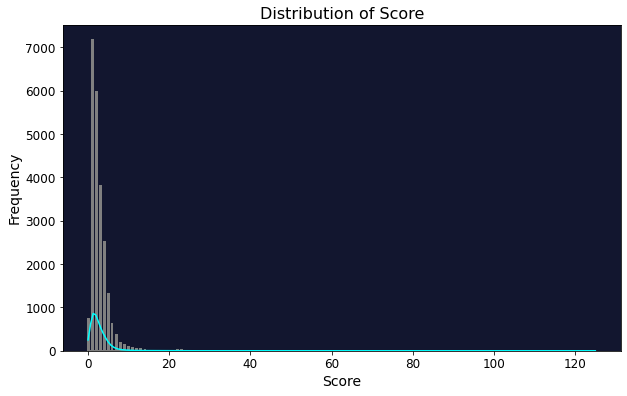

In [ ]:
# Set plot size
plt.figure(figsize=(10, 6))

# Plot the distribution of score
sns.histplot(data=questions_n_scores_tags, x='score', kde=True, linewidth=2, color='cyan', edgecolor='grey', alpha=0.7)

# Customize plot appearance
plt.title("Distribution of Score", fontsize=16)
plt.xlabel("Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Increase tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


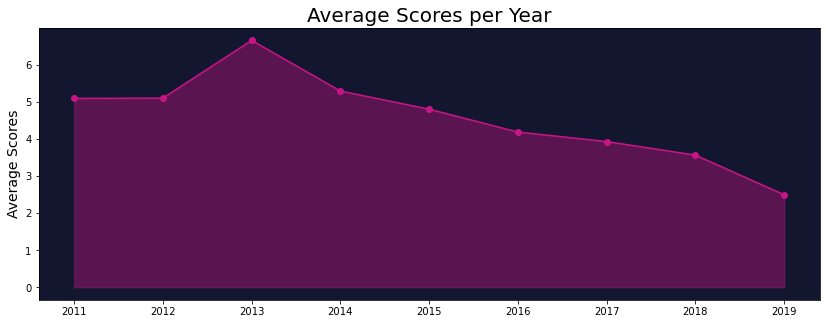

In [ ]:
# Extract the unique years from the dataset
years = question_final_bl['Year'].unique()

# Calculate the average score per year
average_scores_per_year = []
for y in years:
    scores =  question_final_bl.loc[question_final_bl['Year'] == y, 'score'].mean()
    average_scores_per_year.append(scores)

# Create a new DataFrame to store the data
to_plot = pd.DataFrame({'years': years, 'average_scores': average_scores_per_year})

# Sort the DataFrame by years
to_plot = to_plot.sort_values(by='years')

# Plot the data
plt.figure(figsize=(14, 5))
plt.plot('years', 'average_scores', data=to_plot, marker='o', color='mediumvioletred')
x = to_plot['years']
y = to_plot['average_scores']
plt.fill_between(x, y, color='mediumvioletred', alpha=0.4)

plt.ylabel('Average Scores', fontsize=14)
plt.title('Average Scores per Year', fontsize=20)
plt.show()


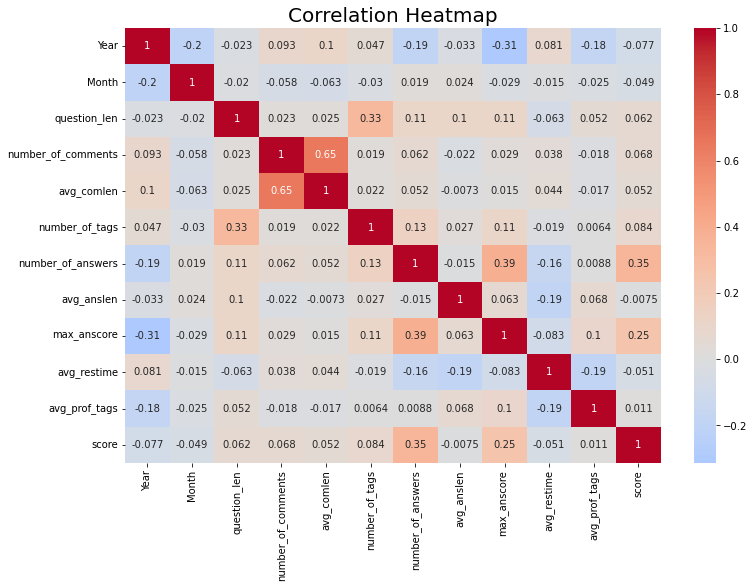

In [ ]:
# Reorder the columns
cols = question_final_bl.columns.tolist()
cols.remove('score')
cols.remove('label')
cols = cols + ['score']
reordered_question_final_bl = question_final_bl[cols]

# Calculate the correlation matrix for the reordered DataFrame
numerical_features_reordered = reordered_question_final_bl.select_dtypes(exclude='object')
corr_matrix_reordered = numerical_features_reordered.corr()

# Draw the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_reordered, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()


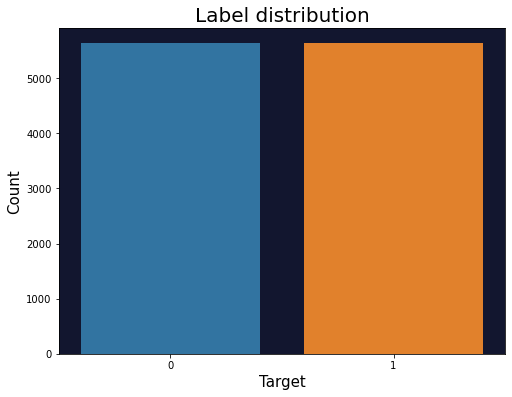

In [ ]:
# Plot the histogram
plt.figure(figsize=(8, 6))
sns.countplot(data=question_final_bl, x='label')
plt.xlabel('Target', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Label distribution', fontsize=20)
plt.show()

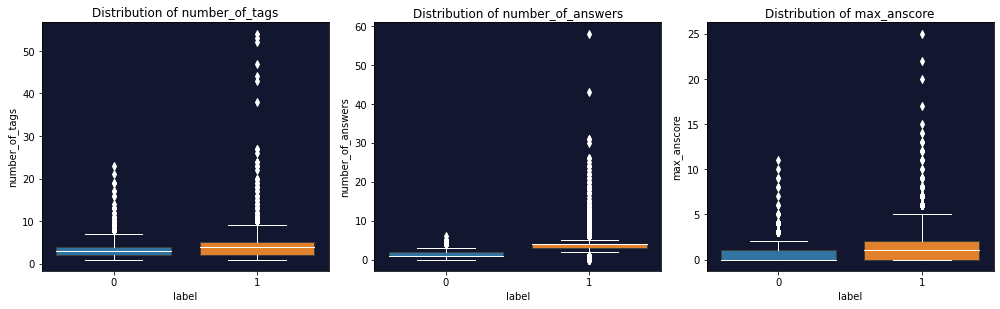

In [ ]:
# Define columns to plot
columns_to_plot = ['number_of_tags', 'number_of_answers', 'max_anscore']

# Set plot size
plt.figure(figsize=(14, 8))

# Loop through columns and create a boxplot for each
for index, column in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 3, index)
    sns.boxplot(x='label', y=column, data=question_final_bl, linewidth=1, fliersize=5, flierprops={'markeredgecolor': 'white', 'markerfacecolor': 'white'})
    plt.title(f'Distribution of {column}')

    # Set the color of the outliers (dots) to white
    for artist in plt.gca().lines + plt.gca().findobj(match=plt.Circle):
        artist.set_color('white')
# Adjust the layout for better appearance
plt.tight_layout()
plt.show()


In [ ]:
# Create an empty dictionary to store the count of each tag for label=0
tag_count = {}

# Loop through each row in the DataFrame
for index, row in question_final_bl[question_final_bl.label==0].iterrows():
    # Split the tags in the 'tags_tag_name' column
    tags = row['tags_tag_name'].split()

    # Loop through the individual tags and update the count in the dictionary
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

# Convert the dictionary to a DataFrame and sort by count
tag_count_df = pd.DataFrame(list(tag_count.items()), columns=['Tag', 'Count'])
tag_count_df = tag_count_df.sort_values(by='Count', ascending=False)

# Display the DataFrame
print(tag_count_df)

                   Tag  Count
39             college   1617
8               career    663
11         engineering    450
16            medicine    399
44              school    340
...                ...    ...
1474            honors      1
1473          michigan      1
1472          annarbor      1
1471  associatesdegree      1
2641   collegeproblems      1

[2642 rows x 2 columns]


In [ ]:
# Create an empty dictionary to store the count of each tag for label=1
tag_count = {}

# Loop through each row in the DataFrame
for index, row in question_final_bl[question_final_bl.label==1].iterrows():
    # Split the tags in the 'tags_tag_name' column
    tags = row['tags_tag_name'].split()

    # Loop through the individual tags and update the count in the dictionary
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

# Convert the dictionary to a DataFrame and sort by count
tag_count_df1 = pd.DataFrame(list(tag_count.items()), columns=['Tag', 'Count'])
tag_count_df1 = tag_count_df1.sort_values(by='Count', ascending=False)

# Display the DataFrame
print(tag_count_df)

                   Tag  Count
39             college   1617
8               career    663
11         engineering    450
16            medicine    399
44              school    340
...                ...    ...
1474            honors      1
1473          michigan      1
1472          annarbor      1
1471  associatesdegree      1
2641   collegeproblems      1

[2642 rows x 2 columns]


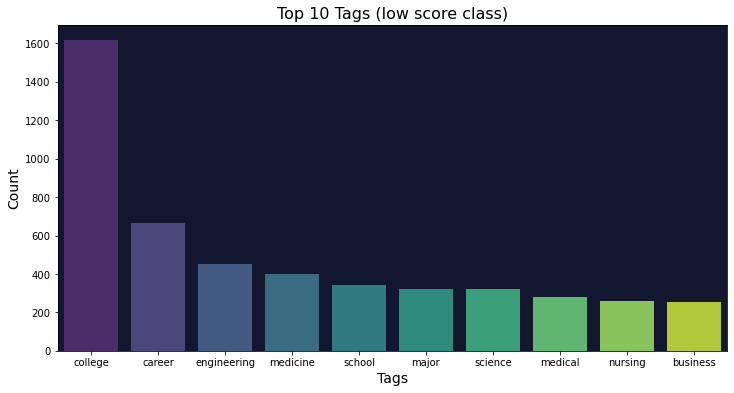

In [ ]:
# Select the top 10 tags by count
top_10_tags = tag_count_df.head(10)

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_tags, x='Tag', y='Count', palette='viridis')

# Customize the plot appearance
plt.title("Top 10 Tags (low score class)", fontsize=16)
plt.xlabel("Tags", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.show()

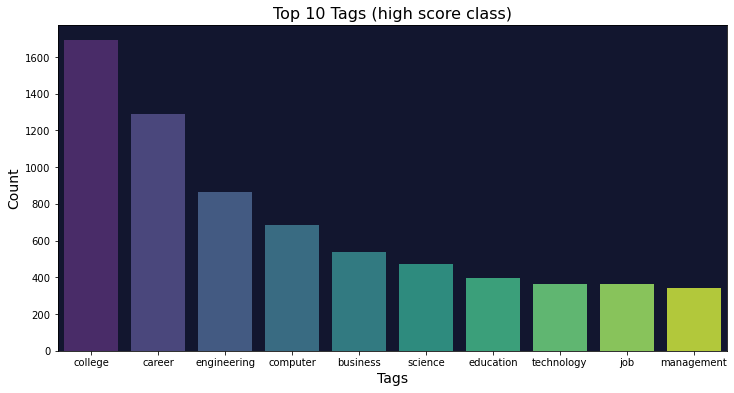

In [ ]:
# Select the top 10 tags by count
top_10_tags = tag_count_df1.head(10)

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_tags, x='Tag', y='Count', palette='viridis')

# Customize the plot appearance
plt.title("Top 10 Tags (high score class)", fontsize=16)
plt.xlabel("Tags", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.show()


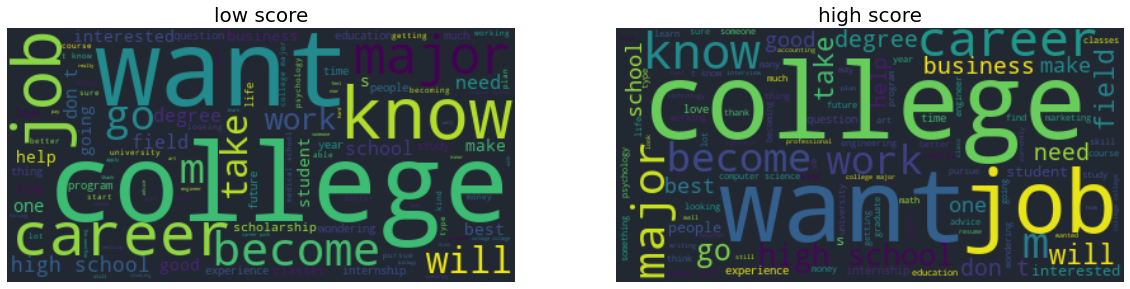

In [ ]:
# Split the dataset into two groups based on the labels
group_0 = questions_n_scores_tags[questions_n_scores_tags['label'] == 0]
group_1 = questions_n_scores_tags[questions_n_scores_tags['label'] == 1]

# Combine all question text for each group
text_0 = ' '.join(group_0['question_whole'])
text_1 = ' '.join(group_1['question_whole'])

# Create word clouds for each group
wordcloud_0 = WordCloud(background_color='#222831', max_words=100).generate(text_0)
wordcloud_1 = WordCloud(background_color='#222831', max_words=100).generate(text_1)

# Display the word clouds
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.title('low score', fontsize=20)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title('high score', fontsize=20)
plt.axis("off")

plt.show()